In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("shrinkage_data_2.1.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

### GZZ:

In [3]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 10^7
lambda = 2e1
Print = true;

In [4]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 42.88 min; zz bounces = 69773, hyp bounces = 4669, total time of process = 238.321 
20 percent attempts in 64.01 min; zz bounces = 120163, hyp bounces = 9488, total time of process = 478.246 
30 percent attempts in 78.17 min; zz bounces = 154083, hyp bounces = 14322, total time of process = 719.235 
40 percent attempts in 93.32 min; zz bounces = 195523, hyp bounces = 19206, total time of process = 959.812 
50 percent attempts in 108.55 min; zz bounces = 244618, hyp bounces = 23990, total time of process = 1199.999 
60 percent attempts in 123.81 min; zz bounces = 295360, hyp bounces = 28702, total time of process = 1440.060 
70 percent attempts in 138.23 min; zz bounces = 338069, hyp bounces = 33429, total time of process = 1680.525 
80 percent attempts in 152.71 min; zz bounces = 379879, hyp bounces = 38264, total time of process = 1921.627 
90 percent attempts in 167.92 min; zz bounces = 430383, hyp bounces = 43062, total time of process = 2161.674 
100 percent 

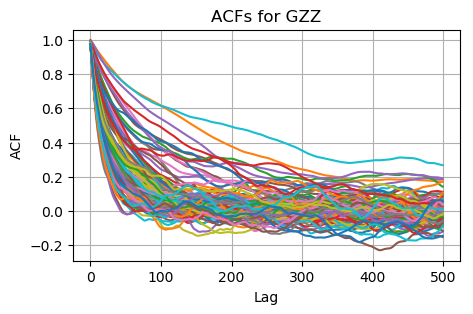

In [5]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()